In [1]:
import pandas as pnd

col_names = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
pima = pnd.read_csv('diabetes.csv',header=None,names=col_names)
print(pima)

        pregnant  glucose             bp           skin  insulin   bmi  \
0    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
1              6      148             72             35        0  33.6   
2              1       85             66             29        0  26.6   
3              8      183             64              0        0  23.3   
4              1       89             66             23       94  28.1   
5              0      137             40             35      168  43.1   
6              5      116             74              0        0  25.6   
7              3       78             50             32       88    31   
8             10      115              0              0        0  35.3   
9              2      197             70             45      543  30.5   
10             8      125             96              0        0     0   
11             4      110             92              0        0  37.6   
12            10      168             

In [2]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [3]:
pima.shape

(769, 9)

In [4]:
feature_cols = ['pregnant','insulin','bmi','age']
x = pima[feature_cols]
y = pima.label
x.shape
t_x = []
t_y = []
import numpy as np
x = np.array(x)
y = np.array(y)
c = 0
for inf in x:
    if (c>0):
        tm = [float(j) for j in inf]
        t_x.append(tm)
        t_y.append(y[c])
        c = c+1
    else:
        c = c+1
print(len(t_x))
print(len(t_y))

768
768


In [5]:
x = t_x
y = t_y

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

x = np.array(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)
lg = LogisticRegression()
lg.fit(x_train,y_train)
y_pred = lg.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))


0.6927083333333334


In [7]:
tm = [float(j) for j in y_test]
print(len(tm))
y_test = pnd.Series(tm)
print(y_test.value_counts())

tm = [float(j) for j in y_pred]
print(len(tm))
y_pred = pnd.Series(tm)

192
0.0    130
1.0     62
dtype: int64
192


In [8]:
#calculate the perentege of one
y_test.mean()

0.3229166666666667

In [9]:
#calculate the perentege of zero
1-y_test.mean()

0.6770833333333333

In [10]:
#examin the first 25 value true and predicted responce
print('true:',y_test.values[0:25])
print('pred:',y_pred.values[0:25])

true: [1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 0.]
pred: [0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [11]:
#note:first argument is true value and second argument is predicted
print(y_test.value_counts())
print(metrics.confusion_matrix(y_test,y_pred))

0.0    130
1.0     62
dtype: int64
[[118  12]
 [ 47  15]]


In [12]:
confusion = metrics.confusion_matrix(y_test,y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [13]:
#classification accuracy
print((TP+TN)/float(TP+TN+FP+FN))
print(metrics.accuracy_score(y_test,y_pred))

0.6927083333333334
0.6927083333333334


In [14]:
#classification error
print((FP+FN)/float(TP+TN+FP+FN))
print(1-metrics.accuracy_score(y_test,y_pred))

0.3072916666666667
0.30729166666666663


In [15]:
#sensitivity:when the actual value is positive.how often predic correct
print(TP/(TP+FN))
print(metrics.recall_score(y_test,y_pred))

0.24193548387096775
0.24193548387096775


In [16]:
#specifity:when the actual value is negative.how often predic correct
print(TN/(TN+FP))

0.9076923076923077


In [17]:
#False positive rate:when the actual value is negative.how often predic incorrect
print(FP/(TN+FP))

0.09230769230769231


In [18]:
#Precision:when positive predicted,how often prediction is correct
print(TP/(TP+FP))

0.5555555555555556


In [19]:
#print the first 10 predicted responce
lg.predict(x_test)[0:10]

array(['0', '0', '0', '0', '0', '0', '0', '1', '0', '1'], dtype='<U1')

In [20]:
#first 10 predicted probability
lg.predict_proba(x_test)[0:10,:]

array([[0.63247571, 0.36752429],
       [0.71643656, 0.28356344],
       [0.71104114, 0.28895886],
       [0.5858938 , 0.4141062 ],
       [0.84103973, 0.15896027],
       [0.82934844, 0.17065156],
       [0.50110974, 0.49889026],
       [0.48658459, 0.51341541],
       [0.72321388, 0.27678612],
       [0.32810562, 0.67189438]])

In [21]:
#first 10 predicted probability for class 1
lg.predict_proba(x_test)[0:10,1]

array([0.36752429, 0.28356344, 0.28895886, 0.4141062 , 0.15896027,
       0.17065156, 0.49889026, 0.51341541, 0.27678612, 0.67189438])

Text(0,0.5,'Frequency')

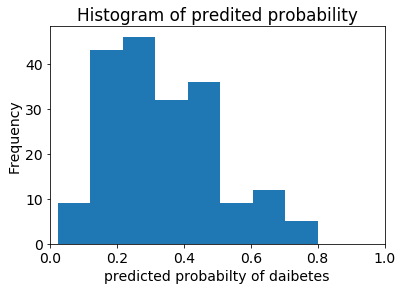

In [22]:
y_pred_prob = lg.predict_proba(x_test)[:,1]
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size']=14
plt.hist(y_pred_prob,bins=8)
plt.xlim(0,1)
plt.title('Histogram of predited probability')
plt.xlabel('predicted probabilty of daibetes')
plt.ylabel('Frequency')

In [23]:
#thershold is default 0.5
#decrease the thershold in order to increase the sesitvity
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob],0.3)[0]

In [24]:
#print first 10 value responce
y_pred_prob[0:10]
y_pred_class[0:10]

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 1.])

In [25]:
print(confusion)
print(metrics.confusion_matrix(y_test,y_pred_class))

[[118  12]
 [ 47  15]]
[[80 50]
 [16 46]]


In [26]:
#sensitivity has increased
#specifity has decreased
print(46/float(46+16))
print(80/float(80+50))

0.7419354838709677
0.6153846153846154


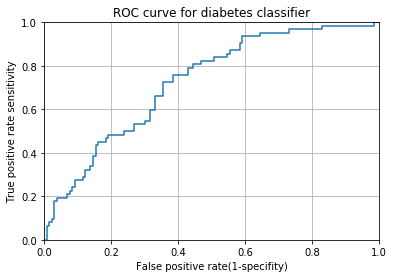

In [27]:
#ROC Curve
fpr,tpr,thersholds = metrics.roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False positive rate(1-specifity)')
plt.ylabel('True positive rate sensitivity')
plt.grid(True)

In [28]:
#define a function that take thershold and get sesitivity and specifity
def evaluate_thershold(thershold):
    print('sesitivity',tpr[thersholds > thershold][-1])
    print('specifity',1-fpr[thersholds > thershold][-1])

In [29]:
evaluate_thershold(0.5)

sesitivity 0.24193548387096775
specifity 0.9076923076923077


In [30]:
evaluate_thershold(0.3)

sesitivity 0.7258064516129032
specifity 0.6153846153846154


In [31]:
print(metrics.roc_auc_score(y_test,y_pred_prob))

0.7245657568238213


In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelBinarizer
feature_cols = ['pregnant','insulin','bmi','age']
#x = pima[feature_cols]
#y = pima.label
x = t_x
y = t_y
lb = LabelBinarizer()
lb.fit(y)
y = lb.transform(y)

#print(len(y))
cross_val_score(lg,x,y,cv=10,scoring='roc_auc').mean()
#cross_val_score(lg,n,y,cv=10,scoring='roc_auc').mean()

C:\Users\HASAN TAREK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HASAN TAREK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HASAN TAREK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HASAN TAREK\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

0.7378233618233618